 `ROOT` to `HDF5` Conversion


In [11]:
%%bash
root2hdf5 -f samples/ZprimeToTT_M4000_W400_total_mm.root

INFO:rootpy.root2hdf5] Converting samples/ZprimeToTT_M4000_W400_total_mm.root ...
INFO:rootpy.root2hdf5] Will convert 8 trees in /
INFO:rootpy.root2hdf5] Converting tree 'T_0' with 0 entries ...
INFO:rootpy.root2hdf5] Converting tree 'T_1' with 0 entries ...
INFO:rootpy.root2hdf5] Converting tree 'T_2' with 6 entries ...
INFO:rootpy.root2hdf5] Converting tree 'T_3' with 40 entries ...
INFO:rootpy.root2hdf5] Converting tree 'T_4' with 4 entries ...
INFO:rootpy.root2hdf5] Converting tree 'T_5' with 41 entries ...
INFO:rootpy.root2hdf5] Converting tree 'T_6' with 156 entries ...
INFO:rootpy.root2hdf5] Converting tree 'T_7' with 1240 entries ...
INFO:rootpy.root2hdf5] Created samples/ZprimeToTT_M4000_W400_total_mm.h5


((96483,), (1240,))
('top_xl_7', 'antitop_xl_7', 'cosTheta1r_7', 'cosTheta2r_7', 'rmin0_7', 'rmin1_7', 'sT_met_7', 'MT2r_7', 'weight_7', 'channel_7', 'MCTruth_MP_7', 'MCTruth_WP_7')


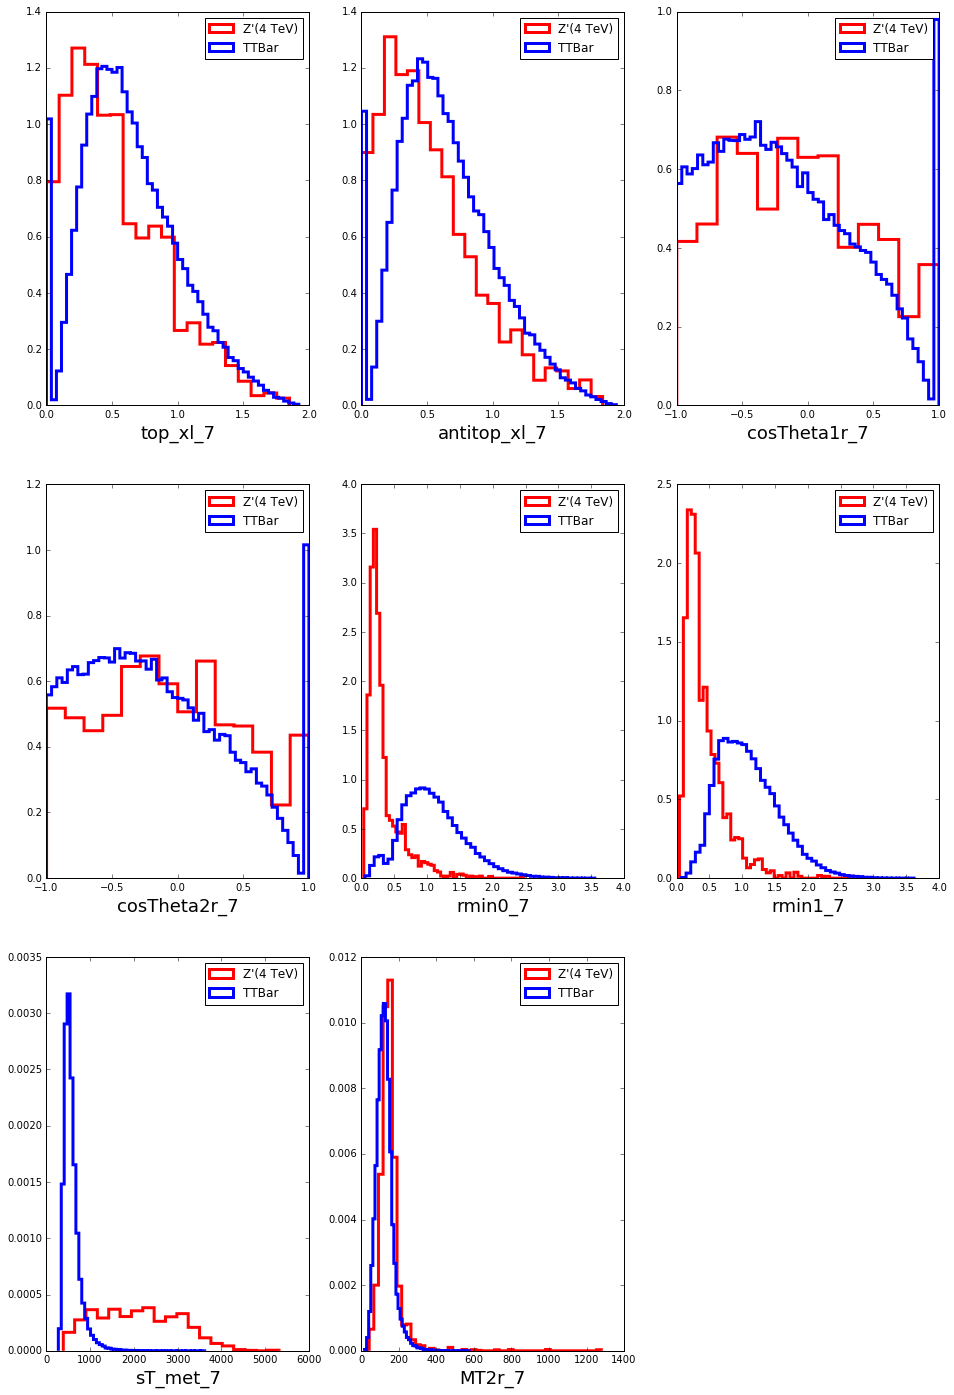

In [113]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename = {'bkg':'samples/TTbar0-700_mm.h5', 'sig':'samples/ZprimeToTT_M4000_W400_total_mm.h5'}
h5file = {}
params = {}
Tree_name = unicode('T_7')

h5file['bkg'] = h5py.File(filename['bkg'], 'r')
h5file['sig'] = h5py.File(filename['sig'], 'r') 

params['bkg'] = h5file['bkg'][Tree_name][()] 
params['sig'] = h5file['sig'][Tree_name][()] 

print(params['bkg'].shape, params['sig'].shape)
print(params['bkg'].dtype.names)
features = params['bkg'].dtype.names[0:8];



fig, ax = plt.subplots(3, 3, figsize=(16,24))
fig.delaxes(ax[2,2])

for i in range(len(features)): 
    sns.distplot(params['sig'][:][features[i]], norm_hist=True, kde=False, ax=ax[i/3,i%3], label="Z'(4 TeV)",
                 hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "red",
                           "weights": params['sig'][:]['weight_7']})    
    sns.distplot(params['bkg'][:][features[i]], norm_hist=True, kde=False, ax=ax[i/3,i%3], label="TTBar",
                 hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "blue",
                           "weights": params['bkg'][:]['weight_7'] })
    ax[i/3,i%3].legend()
    ax[i/3,i%3].set_xlabel(features[i], fontsize=18) # Xlabel
